This is a social network ad dataset that includes three columns: Age, Estimated Salary, and Purchased.

    Age:              Integer
    Estimated Salary: Integer
    Purchased:        Integer (0 or 1)
    
The goal with this data is to build a classifier that is able to predict whether or not a given user will purchase an ad or not given the age and estimated salary of the user. Obviously, this is not a very good dataset to predict this; however, this is just a little intro for me to play around with different classification methods.

First we need to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.chdir('C:\\Users\\logtr\\SocialAd')
df = pd.read_csv('Social_Network_Ads.csv')
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]



My first classification method will be using Support Vectors (SVM). SVMs are efficient on datasets that are linearly separable and allow a kernel trick to work with data that is not linearly separable. I do not currently know whether the data is linearly separable or not so I will first attempt to a linear SVM and then move to utilizing the kernel trick if that is needed.

First I am going to check to see if the dataset is balanced.

In [3]:
print("Num Purchased = ", len(df.loc[df['Purchased'] == 1]))
print("Num Not Purchased = ", len(df.loc[df['Purchased'] == 0]))


Num Purchased =  143
Num Not Purchased =  257


Sadly this dataset is not balanced.

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

x = df.iloc[:,0:2].values
y = df['Purchased'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

300
100
300
100


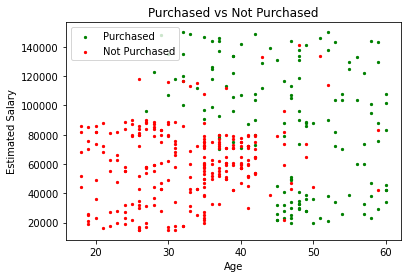

In [5]:
purch = df.loc[df['Purchased'] == 1]
notPurch = df.loc[df['Purchased'] == 0]
data = (purch, notPurch)
colors = ("green", "red")
groups = ("Purchased", "Not Purchased")

figure = plt.figure()
ax = figure.add_subplot()

for d, c, g in zip(data, colors, groups):
    curX, curY = d.iloc[:,0].values, d.iloc[:,1].values
    ax.scatter(curX, curY, c=c, label=g, s=5)

plt.title("Purchased vs Not Purchased")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()



In [6]:
model = SVC()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        62
           1       1.00      0.47      0.64        38

    accuracy                           0.80       100
   macro avg       0.88      0.74      0.75       100
weighted avg       0.85      0.80      0.78       100

[[62  0]
 [20 18]]


In [7]:
cParams1 = np.arange(1, 101, 0.1)
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
bestParam1 = 1
model1 = SVC()
model1Acc, model1C = 0, 0
model1kern = ''
model1gamm = ''

print("Starting C Tuning...")
#i = 0
for c in cParams1:
    
   #start = time.time()
    curModel = SVC(C=c)
    curModel.fit(x_train, y_train)
    score = curModel.score(x_test, y_test)
   #print("For C =", c, ", accuracy =", score)

    if score > model1Acc:
        model1C = c
        model1Acc = score
        model1 = curModel
    
   #print("Iteration", i, "=",time.time() - start)
   #i += 1

print("Best Model 1 Accuracy:", model1Acc, "| C =", model1C)
model1preds = model1.predict(x_test)
print(classification_report(y_test, model1preds))
print(confusion_matrix(y_test, model1preds))

print("\nStarting K tuning...")
model1K = 'rbf'
for k in kernels:
    curModel = SVC(C=model1C, kernel=k)
    curModel.fit(x_train, y_train)
    score = curModel.score(x_test, y_test)
    
    if score > model1Acc:
        model1Acc = score
        model1 = curModel
        model1K = k

print("Best Model 1 Accuracy:", model1Acc, "| K =", model1K)
model1preds = model1.predict(x_test)
print(classification_report(y_test, model1preds))
print(confusion_matrix(y_test, model1preds))

Starting C Tuning...
Best Model 1 Accuracy: 0.82 | C = 24.90000000000002
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        62
           1       1.00      0.53      0.69        38

    accuracy                           0.82       100
   macro avg       0.89      0.76      0.78       100
weighted avg       0.86      0.82      0.80       100

[[62  0]
 [18 20]]

Starting K tuning...
Best Model 1 Accuracy: 0.9 | K = linear
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        62
           1       0.97      0.76      0.85        38

    accuracy                           0.90       100
   macro avg       0.92      0.87      0.89       100
weighted avg       0.91      0.90      0.90       100

[[61  1]
 [ 9 29]]


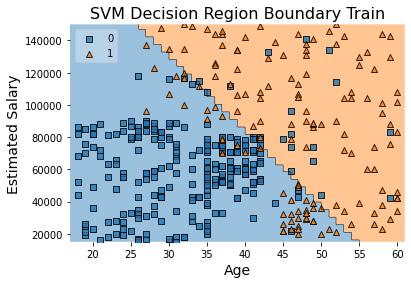

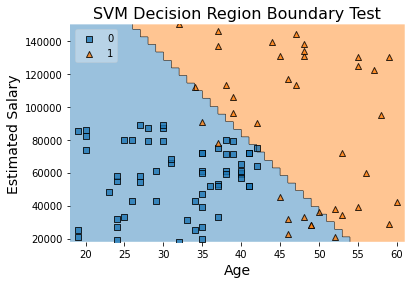

In [8]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=df.iloc[:, 0:2].values, y=df.iloc[:, 2].values, clf=model1, legend=2)
plt.xlabel('Age', size=14)
plt.ylabel('Estimated Salary', size=14)
plt.title('SVM Decision Region Boundary Train', size=16)
plt.show()

plot_decision_regions(X=x_test, y=y_test, clf=model1, legend=2)
plt.xlabel('Age', size=14)
plt.ylabel('Estimated Salary', size=14)
plt.title('SVM Decision Region Boundary Test', size=16)
plt.show()



In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

os.chdir('C:\\Users\\logtr\\SocialAd')
df = pd.read_csv('Social_Network_Ads.csv')

x = df.iloc[:,0:2].values
y = df['Purchased'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y)

l1Model = LogisticRegression(solver='liblinear', penalty='l1').fit(x_train, y_train)
l2Model = LogisticRegression(solver='liblinear', penalty='l2').fit(x_train, y_train)

l1PredProbs = l1Model.predict_proba(x_test)
l1Predictions = l1Model.predict(x_test)
l1Score = l1Model.score(x_test, y_test)

l2PredProbs = l2Model.predict_proba(x_test)
l2Predictions = l2Model.predict(x_test)
l2Score = l2Model.score(x_test, y_test)

print(confusion_matrix(y_test, l1Predictions))
print(confusion_matrix(y_test, l2Predictions))
print(l1Score, l2Score)

[[59  5]
 [10 26]]
[[64  0]
 [36  0]]
0.85 0.64


Upon first analysis, it seems that the logistical model with l1 penalty achieves a higher accuracy of 85% compared to 64% and it is interesting to see that the l2 model has 0 false positives and true negatives. I would not be doing the logistical models justly if I were not to experiment with the regularization term and will thus be doing that now. 

In [30]:
cValues = np.arange(0.1, 100, 0.1)

l1C, l1Acc, l2C, l2Acc = 0, 0, 0, 0

for c in cValues:
    curl1Model = LogisticRegression(solver='liblinear', penalty='l1', C=c)
    curl2Model = LogisticRegression(solver='liblinear', penalty='l2', C=c)
    curl2Model.fit(x_train, y_train)
    curl1Model.fit(x_train, y_train)
    
    if curl1Model.score(x_test, y_test) > l1Acc:
        l1C = c
        l1Acc = curl1Model.score(x_test, y_test)
    
    if curl2Model.score(x_test, y_test) > l2Acc:
        l2C = c
        l2Acc = curl2Model.score(x_test, y_test)

print("L1 model best C =", l1C, "with Accuracy =", l1Acc)
print("L2 model best C =", l2C, "with Accuracy =", l2Acc)

l1Model = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)
l1Model.fit(x_train, y_train)
l1ModelPreds = l1Model.predict(x_test)
print(classification_report(y_test, l1ModelPreds))
print(confusion_matrix(y_test, l1ModelPreds)) 

L1 model best C = 0.1 with Accuracy = 0.86
L2 model best C = 0.1 with Accuracy = 0.64
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        64
           1       0.92      0.67      0.77        36

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100

[[62  2]
 [12 24]]


In [48]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

os.chdir('C:\\Users\\logtr\\SocialAd')
df = pd.read_csv('Social_Network_Ads.csv')

x = df.iloc[:,0:2].values
y = df['Purchased'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y)

from sklearn.neighbors import NearestNeighbors
bestK = 1
bestAcc = 0

for i in range(500):
    for k in range(1, 51):
        curModel = KNeighborsClassifier(n_neighbors = k)
        curModel.fit(x_train, y_train)
        if curModel.score(x_test, y_test) > bestAcc:
            bestK = k
            bestAcc = curModel.score(x_test, y_test)

print("Best k =", bestK, "with an Accuracy =", bestAcc)
bestModel = KNeighborsClassifier(n_neighbors=bestK)
bestModel.fit(x_train, y_train)
bestModelPreds = bestModel.predict(x_test)
print(classification_report(y_test, bestModelPreds))
print(confusion_matrix(y_test, bestModelPreds))

Best k = 15 with an Accuracy = 0.87
              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.89      0.71      0.79        35

    accuracy                           0.87       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.87      0.87      0.87       100

[[62  3]
 [10 25]]


In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

os.chdir('C:\\Users\\logtr\\SocialAd')
df = pd.read_csv('Social_Network_Ads.csv')

x = df.iloc[:,0:2].values
y = df['Purchased'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y)

tree1 = DecisionTreeClassifier(criterion='entropy')
tree2 = DecisionTreeClassifier(criterion='gini')
tree1.fit(x_train, y_train)
tree2.fit(x_train, y_train)
tree1Preds = tree1.predict(x_test)
tree2Preds = tree2.predict(x_test)

print(classification_report(y_test, tree1Preds))
print(confusion_matrix(y_test, tree1Preds))
print(classification_report(y_test, tree2Preds))
print(confusion_matrix(y_test, tree2Preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        57
           1       0.88      0.84      0.86        43

    accuracy                           0.88       100
   macro avg       0.88      0.87      0.88       100
weighted avg       0.88      0.88      0.88       100

[[52  5]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        57
           1       0.91      0.91      0.91        43

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

[[53  4]
 [ 4 39]]


[Text(154.13048780487804, 210.645, 'X[0] <= 42.5\ngini = 0.444\nsamples = 300\nvalue = [200, 100]'),
 Text(89.82439024390244, 197.055, 'X[1] <= 90500.0\ngini = 0.24\nsamples = 215\nvalue = [185, 30]'),
 Text(48.99512195121952, 183.465, 'X[0] <= 36.5\ngini = 0.062\nsamples = 186\nvalue = [180, 6]'),
 Text(40.829268292682926, 169.875, 'gini = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(57.1609756097561, 169.875, 'X[1] <= 83500.0\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(48.99512195121952, 156.285, 'X[1] <= 67500.0\ngini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(40.829268292682926, 142.695, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(57.1609756097561, 142.695, 'X[0] <= 41.5\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(32.66341463414634, 129.10500000000002, 'X[1] <= 70500.0\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(24.49756097560976, 115.515, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(40.829268292682926, 115.515, 'X[1] <= 71500.0\ngini

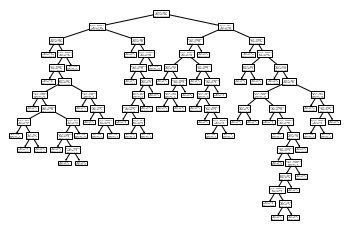

In [30]:
tree.plot_tree(tree2)

In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

os.chdir('C:\\Users\\logtr\\SocialAd')
df = pd.read_csv('Social_Network_Ads.csv')

x = df.iloc[:,0:2].values
y = df['Purchased'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y)

bestNumEstim = 10
bestAcc = 0
bestModel = RandomForestClassifier(n_estimators = bestNumEstim)

for i in range(10, 501, 10):
    curRF = RandomForestClassifier(n_estimators = i)
    curRF.fit(x_train, y_train)
    
    if curRF.score(x_test, y_test) > bestAcc:
        bestNumEstim = i
        bestAcc = curRF.score(x_test, y_test)
        bestModel = curRF
        
print("Best Num Estimators =", bestNumEstim, "with Accuracy =", bestAcc)

Best Num Estimators = 20 with Accuracy = 0.89


In [36]:
print(classification_report(y_test, bestModel.predict(x_test)))
print(confusion_matrix(y_test, bestModel.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        68
           1       0.86      0.78      0.82        32

    accuracy                           0.89       100
   macro avg       0.88      0.86      0.87       100
weighted avg       0.89      0.89      0.89       100

[[64  4]
 [ 7 25]]


In [ ]:
x = df.iloc[:,0:2]
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn import tree

os.chdir('C:\\Users\\logtr\\SocialAd')
df = pd.read_csv('Social_Network_Ads.csv')

x = df.iloc[:,0:2].values
y = df['Purchased'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

bestSVCAcc = 0
bestSVC = SVC()

for n in range(50):
    for i in range(1, 101):
        svm = SVC(C=i)
        svm.fit(x_train, y_train)
        curAcc = svm.score(x_test, y_test)

        if curAcc > bestSVCAcc:
            bestSVCACC = curAcc
            bestSVC = svmS

bestDTreeAcc = 0
bestDTree = DecisionTreeClassifier()

for n in range(50):
    dTree = DecisionTreeClassifier(criterion = 'gini')
    dTree.fit(x_train, y_train)
    curAcc = dTree.score(x_test, y_test)
    
    if curAcc > bestDTreeAcc:
        bestDTreeAcc = curAcc
        bestDTree = dTree

print(classification_report(y_test, bestSVC.predict(x_test)))
print(classification_report(y_test, bestDTree.predict(x_test)))

In [ ]:
from sklearn.model_selection import train_test_split, KFold

kFoldSVMAcc = 0
kFoldSVMModel = SVC()
bestKSVM = 5

kFoldDTreeAcc = 0
kFoldDTreeModel = DecisionTreeClassifier()
bestKDTree = 5

x = df.iloc[:,0:2]

for k in range(5, 11):
    kf = KFold(n_splits=k, random_state=None)
    
    for train_index , test_index in kf.split(x):
        x_train , x_test = x.iloc[train_index,:], x.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
        
        curSVM = SVC()
        curDTree = DecisionTreeClassifier()
        
        curSVM.fit(x_train, y_train)
        curDTree.fit(x_train, y_train)
        
        svmScore = curSVM.score(x_test, y_test)
        dtreeScore = curDTree.score(x_test, y_test)
        
        if svmScore > kFoldSVMAcc:
            kFoldSVMAcc = svmScore
            bestKSVM = k
            kFoldSVMModel = curSVM
        
        if dtreeScore > kFoldDTreeAcc:
            kFoldDTreeAcc = dtreeScore
            bestKDTree = k
            kFoldDTreeModel = curDTree

print("SVM\n\tK =", bestKSVM, "\n\tAccuracy =", kFoldSVMAcc)
print("DTree\n\tK =", bestKDTree, "\n\tAccuracy =", kFoldDTreeAcc)